# Simple Logistic Regression from scratch

In [19]:
# load required library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import random
# load dataset
x, y = load_iris(return_X_y=True)

## Split data 80% training, 20% testing

In [20]:
# We use 100 samples and 2 features for logistic regression function
x_lr = x[:100, :2] # class 0 and 1 balanced
y_lr = y[:100]

In [21]:
# Train test split 80-20 randomly (100 samples)
data = [[x_lr[i, :], y_lr[i]] for i in range(len(x_lr))]
random.shuffle(data)

x_train = np.array([e[0] for e in data[:80]])
y_train = np.array([e[1] for e in data[:80]])

x_test = np.array([e[0] for e in data[80:]])
y_test = np.array([e[1] for e in data[80:]])


### Sigmoid activation function implementation

In [22]:
# Sigmoid activation function

def sig(z: float):
	return 1 / (1 + np.exp(-z))


### Loss function implementation (Cross entropy)

In [23]:
# Loss function: cross entropy
def cross_entropy(y: np.array, y_pred: np.array):
	assert y_pred.shape == y.shape
	return np.array(
		[
			- y[i] * np.log(y_pred[i]) - (1 - y[i]) * np.log(1 - y_pred[i])
			for i in range(y.shape[0])
		]
		).sum()


### Logistic Regression implementation

In [24]:
# model, 1 neuron and sig as activation function

class LogisticRegression:
	def __init__(self, input_dim):
		# Randomly init weights and bias with a float between 0 and 1
		self.b = random.random()
		self.w = np.array([random.random() for _ in range(input_dim)])
		self.input_dim = input_dim

		self.loss_hist = []

	def __call__(self, input: np.array):
		"""Pass features through the network, without boundary

		Args:
			input (np.array): Features

		Returns:
			list[float]: values between 0 and 1
		"""
		assert len(input) > 0
		res = [
			sig(self.b + self.w.T.dot(input[i])) 
			for i in range(len(input))
			]

		return np.array(res).reshape(-1,)

	def acc(self, y: np.array, y_pred: np.array):
		"""Count the number of correct predictions

		Args:
			y (np.array): The true classes
			y_pred (np.array): The predicted classes

		Returns:
			float: The % of correct predictions
		"""
		assert y.shape == y_pred.shape

		count = 0
		for i in range(y.shape[0]):
			if int(y_pred[i] > 0.5) == y[i]: count += 1

		return count * 100 / y.shape[0]

	def predict(self, input: np.array):
		"""Predict the class, using the boundary

		Args:
			input (np.array): The features to predict

		Returns:
			np.array: The predicted classes 
		"""
		assert len(input) > 0

		# Boundary = 0 <=> sig = 1/2 
		res = [
			int(
				sig(self.b + self.w.T.dot(input[i])) > 0.5
			) for i in range(len(input))
			]

		return np.array(res).reshape(-1,)

	def train(self, x: np.array, y: np.array, epochs=20, learning_rate=0.03):
		"""SGD

		Args:
			x (np.array): training input
			y (np.array): training output
		"""
		assert x.shape[0] == y.shape[0]

		for epoch in range(epochs):
			print(f"\n-----------  Epoch {epoch} -----------") 

			# Select one random sample
			index = random.randint(0, x.shape[0]-1)

			# Predict
			pred = self(np.array([x[index]]))
			loss = cross_entropy(np.array([y[index]]), pred)
			self.loss_hist.append(loss)

			# Grad L = (y_pred - y).x
			diff = pred[0] - y[index]

			# Update weights
			self.w = self.w - learning_rate * diff * x[index]
			self.b = self.b - learning_rate * diff
			print(f"Loss: {loss}")

	def evaluate(self, x: np.array, y: np.array):
		print(f"\n-----------  Evaluation -----------") 
		y_pred = self(x)
		loss = cross_entropy(y, y_pred)
		acc = self.acc(y, y_pred)
		print(f"Test Loss: {loss}\nTest Accuracy: {acc}%")


	def get_params(self):
		return [self.b] + self.w

	def get_loss_hist(self):
		return self.loss_hist

### Train

In [25]:
epochs = 10000

model = LogisticRegression(2)
model.train(x_train, y_train, epochs=epochs, learning_rate=0.01)
model.evaluate(x_test, y_test)


-----------  Epoch 0 -----------
Loss: 4.828424628504363

-----------  Epoch 1 -----------
Loss: 0.008274406753569025

-----------  Epoch 2 -----------
Loss: 4.620312697926884

-----------  Epoch 3 -----------
Loss: 0.010371860335637983

-----------  Epoch 4 -----------
Loss: 0.026437604966914763

-----------  Epoch 5 -----------
Loss: 4.172149996854007

-----------  Epoch 6 -----------
Loss: 0.02195067947099149

-----------  Epoch 7 -----------
Loss: 3.6064829522854747

-----------  Epoch 8 -----------
Loss: 3.2804940140816377

-----------  Epoch 9 -----------
Loss: 3.3907828291906283

-----------  Epoch 10 -----------
Loss: 2.6007305461275103

-----------  Epoch 11 -----------
Loss: 2.2977340428101205

-----------  Epoch 12 -----------
Loss: 0.10297535761616589

-----------  Epoch 13 -----------
Loss: 2.2246446378292704

-----------  Epoch 14 -----------
Loss: 0.17265333736953767

-----------  Epoch 15 -----------
Loss: 0.12986011822787866

-----------  Epoch 16 -----------
Loss: 0.

### Plots

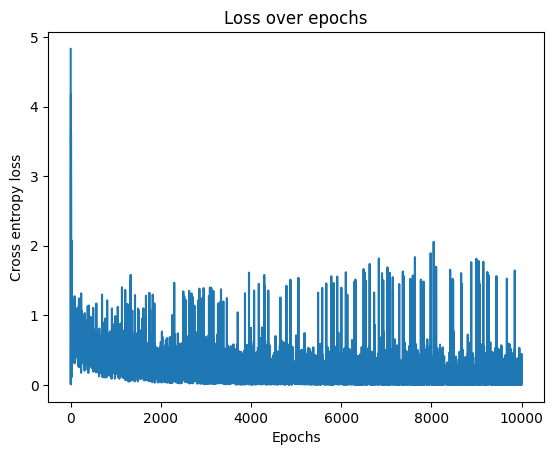

In [26]:
# Accuracy can be good but SGD, using one sample is highly unstable (see loss below)

plt.plot([epoch for epoch in range(epochs)], model.get_loss_hist())
plt.xlabel("Epochs")
plt.ylabel("Cross entropy loss")
plt.title("Loss over epochs")
plt.show()

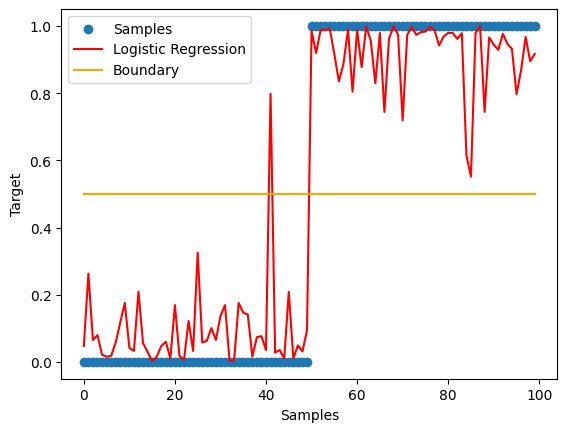

In [27]:
# Plots

x_plot = [i for i in range(len(x_lr))]

y_plot = model(x_lr)

plt.scatter(x_plot, y_lr, label="Samples")
plt.xlabel("Samples")
plt.ylabel("Target")
plt.plot(x_plot, y_plot, c="red", label="Logistic Regression")
plt.plot(x_plot, [0.5]*len(x_plot), label="Boundary", c="orange")
plt.legend()
plt.show()